In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.josn file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#Importing  face mask dataset

#PI to fetch the dataset from Kaggle

!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:01<00:00, 109MB/s]
100% 163M/163M [00:01<00:00, 88.5MB/s]


In [4]:
#extracting the compossed dataset

from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
#importing the dependecies

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_969.jpg', 'with_mask_2672.jpg', 'with_mask_1234.jpg', 'with_mask_529.jpg', 'with_mask_267.jpg']
['with_mask_1870.jpg', 'with_mask_895.jpg', 'with_mask_1569.jpg', 'with_mask_3633.jpg', 'with_mask_3061.jpg']


In [7]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_311.jpg', 'without_mask_3114.jpg', 'without_mask_2553.jpg', 'without_mask_398.jpg', 'without_mask_3233.jpg']
['without_mask_1753.jpg', 'without_mask_3387.jpg', 'without_mask_3298.jpg', 'without_mask_2457.jpg', 'without_mask_3444.jpg']


In [8]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images 3828


In [9]:
#create the labels

with_mask_labels = [1] * 3725
without_mask_labels = [0] *3828

In [10]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [11]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])



7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


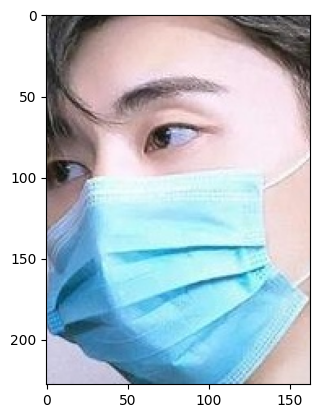

In [12]:
#Displaing with mask image

img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

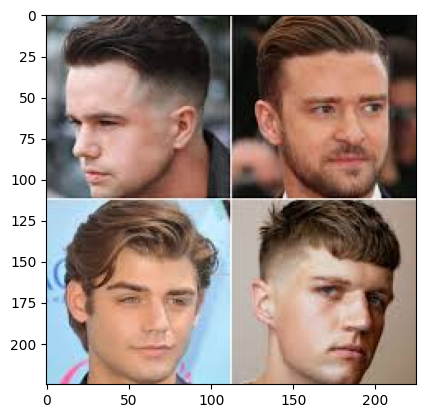

In [15]:

#displaing without mask image

img = mpimg.imread('/content/data/without_mask/without_mask_2457.jpg')
imgplot = plt.imshow(img)
plt.show()

In [16]:
#convert images to numy arrays

with_mask_path = '/content/data/with_mask/'
data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


In [18]:
type(data)


list

In [19]:
len(data)

7553

array([[[ 80,  57,  49],
        [ 79,  56,  48],
        [ 77,  54,  46],
        ...,
        [145, 107,  96],
        [138, 100,  89],
        [135,  97,  86]],

       [[ 80,  57,  49],
        [ 79,  56,  48],
        [ 77,  54,  46],
        ...,
        [149, 111, 100],
        [141, 103,  92],
        [138, 100,  89]],

       [[ 82,  59,  51],
        [ 81,  58,  50],
        [ 78,  54,  46],
        ...,
        [155, 117, 107],
        [147, 109,  98],
        [144, 106,  94]],

       ...,

       [[ 42,  43,  45],
        [ 43,  44,  46],
        [ 46,  47,  49],
        ...,
        [ 33,  43,  52],
        [ 33,  43,  52],
        [ 33,  43,  52]],

       [[ 46,  47,  49],
        [ 46,  47,  49],
        [ 47,  48,  50],
        ...,
        [ 33,  43,  52],
        [ 32,  42,  51],
        [ 32,  42,  52]],

       [[ 47,  48,  50],
        [ 47,  48,  50],
        [ 47,  48,  50],
        ...,
        [ 33,  43,  52],
        [ 32,  42,  51],
        [ 32,  42,  51]]], dtype=uint8)
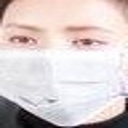

In [20]:
data[0]

In [21]:
#coverting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [28]:
#scaling the data

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

array([[[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       ...,

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]]], dtype=uint8)
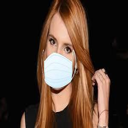

In [29]:
X_train[0]

Building a Convolutional Neural Networks  (CNN)
---



In [30]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [35]:
#compile the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
              )

In [36]:
#training the neural network

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - acc: 0.6957 - loss: 0.7760 - val_acc: 0.8975 - val_loss: 0.2571
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.8730 - loss: 0.3308 - val_acc: 0.8959 - val_loss: 0.2430
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9034 - loss: 0.2433 - val_acc: 0.9256 - val_loss: 0.2330
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9270 - loss: 0.2035 - val_acc: 0.9223 - val_loss: 0.2039
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9388 - loss: 0.1585 - val_acc: 0.9256 - val_loss: 0.2043


In [37]:
#Model Evaluation
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - acc: 0.8996 - loss: 0.2505
Test Accuracy 0.9106552004814148


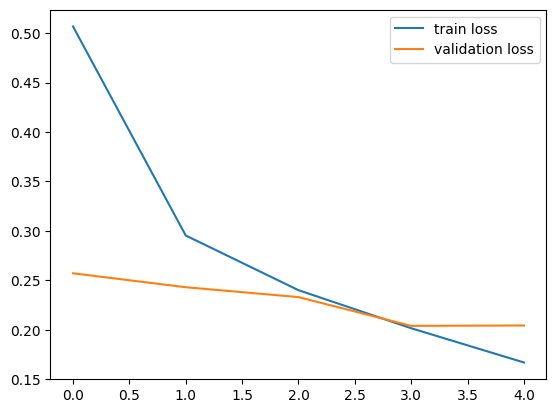

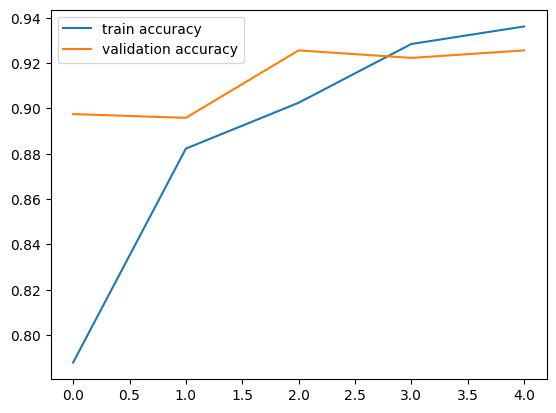

In [38]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of image to be predicted:/content/data/without_mask/without_mask_2457.jpg


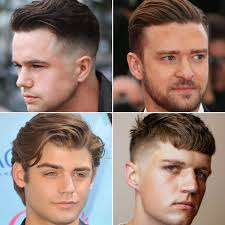

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 648ms/step
[[0.20291075 0.62532234]]
1
The person in the image is wearing a mask


In [41]:
input_image_path = input('Path of image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128, 128))

input_image_scaled = input_image_resized / 255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_2457.jpg


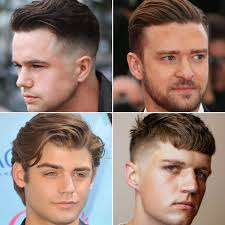

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.20291075 0.62532234]]
1
The person in the image is wearing a mask


In [43]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')